# Visualization for Delegation Based Lock

In [17]:
@time using DataFrames, CSV

bench = @time CSV.read("output/output.csv", DataFrame)


  0.002491 seconds (903 allocations: 60.664 KiB)


  0.019467 seconds (2.76 k allocations: 477.922 KiB)


Row,Id,CpuId,ThreadNum,CpuNum,LoopCount,NumAcquire,HoldTime,CombineTime,Locktype,WaiterType
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64?,String,String15
1,0,0,2,32,60784547,73299,736,4447721010,Flat Combining (SkipList),Spin Parker
2,1,1,2,32,182172649,73212,2199,4449094290,Flat Combining (SkipList),Spin Parker
3,0,0,2,32,52872543,63738,640,5442779130,Flat Combining,Spin Parker
4,1,1,2,32,186860872,75107,2256,3285258270,Flat Combining,Spin Parker
5,0,0,2,32,110690541,133534,1341,3252629550,Flat Combining Fair,Spin Parker
6,1,1,2,32,94593704,38027,1142,4365437070,Flat Combining Fair,Spin Parker
7,0,0,2,32,112126371,136239,1368,5391913950,Flat Combining Fair With Combiner Slice,Spin Parker
8,1,1,2,32,94142618,38102,1145,2213792220,Flat Combining Fair With Combiner Slice,Spin Parker
9,0,0,2,32,219271700,287583,2889,missing,Mutex,Spin Parker


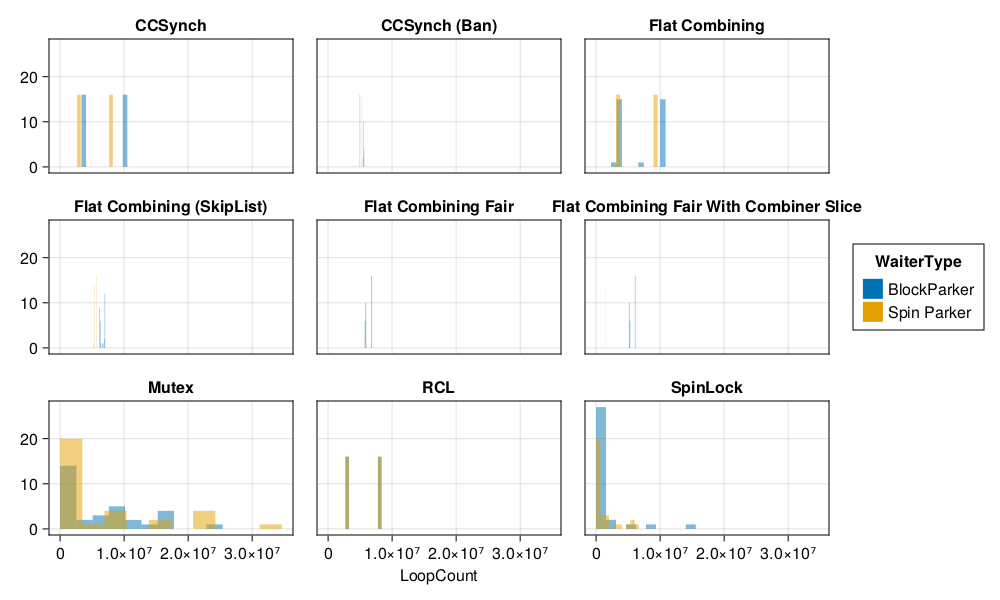

In [36]:
using AlgebraOfGraphics, CairoMakie
using AlgebraOfGraphics: density
using Tidier

CairoMakie.activate!(type = "svg")



loop_comparison = ((@chain bench begin
        Tidier.@filter(ThreadNum == 32)
end) |> data) * mapping(:LoopCount, layout = :Locktype, color = :WaiterType => nonnumeric) * (visual(Hist, bins=10, alpha=0.5))
    
# savefig(loop_comparison, "graphs/loop_comparison.svg")
fig = draw(loop_comparison, figure=(resolution=(1000,600),))

save("graphs/loop_comparison_per_thread_histogram.svg", fig)

fig

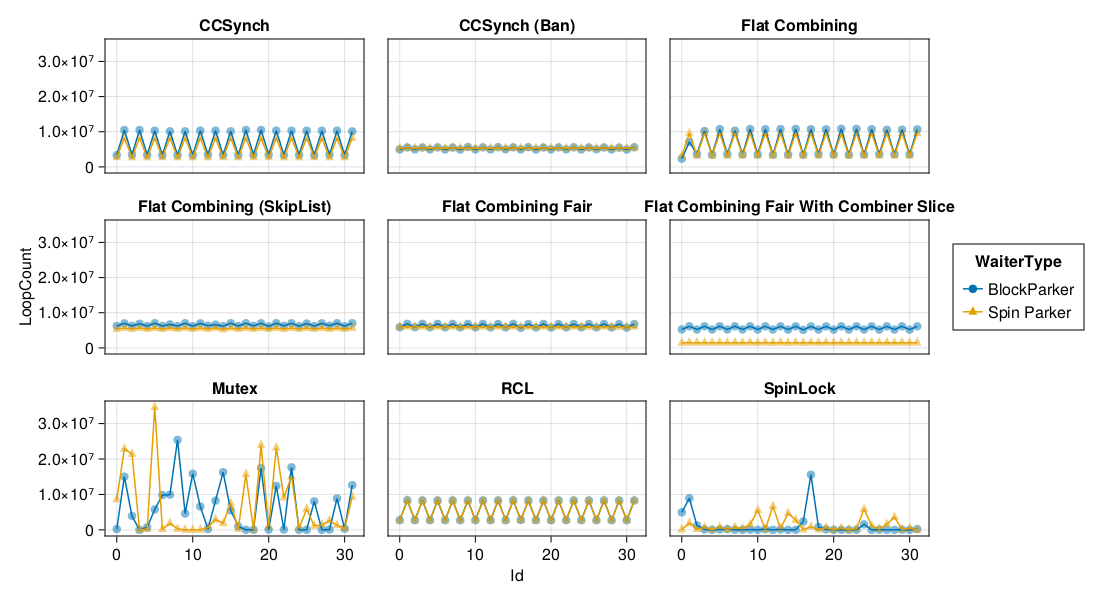

In [42]:
using AlgebraOfGraphics, CairoMakie
using AlgebraOfGraphics: density
using Tidier

CairoMakie.activate!(type = "svg")


loop_comparison = ((@chain bench begin
        Tidier.@filter(ThreadNum == 32)
end) |> data) * mapping(:Id, :LoopCount, layout = :Locktype, color = :WaiterType, marker = :WaiterType) * (visual(Scatter, alpha = 0.5) + visual(Lines))
    
# savefig(loop_comparison, "graphs/loop_comparison.svg")
fig = draw(loop_comparison, figure = (resolution = (1100,600),))

save("graphs/loop_comparison_per_thread.svg", fig)

fig

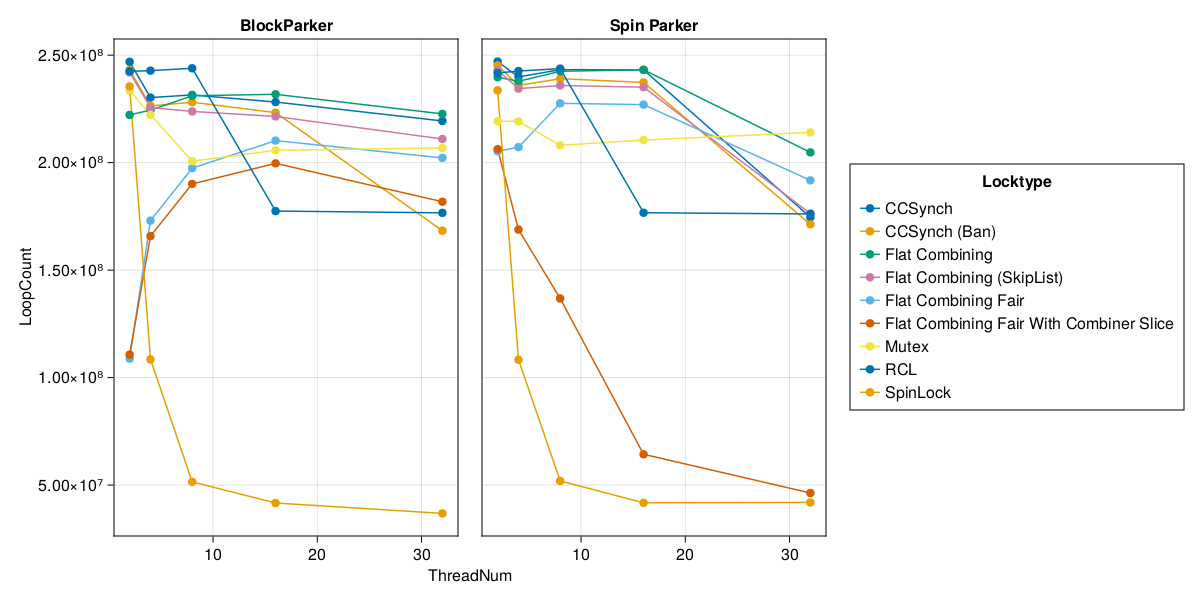

In [44]:
using Tidier
using AlgebraOfGraphics, CairoMakie

bench2 = @chain bench begin
    @group_by(Locktype, WaiterType, ThreadNum)
    @summarise(LoopCount = sum(LoopCount))
    @ungroup
end

plt = data(bench2) * mapping(:ThreadNum, :LoopCount, color = :Locktype, layout = :WaiterType) * (visual(Lines) + visual(Scatter))

fig = draw(plt, figure = (resolution=(1200,600),))

save("graphs/loop_comparison_together.svg", fig)

fig

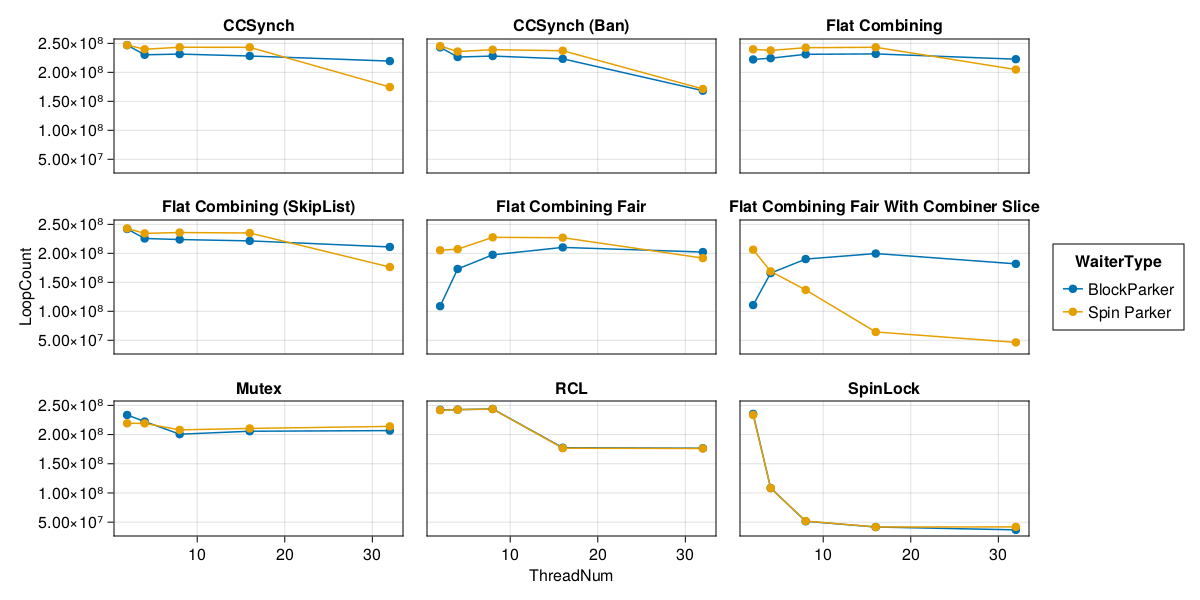

In [24]:
using Tidier
using AlgebraOfGraphics, CairoMakie

bench2 = @chain bench begin
    @group_by(Locktype, WaiterType, ThreadNum)
    @summarise(LoopCount = sum(LoopCount))
    @ungroup
end

plt = data(bench2) * mapping(:ThreadNum, :LoopCount, layout = :Locktype, color = :WaiterType) * (visual(Lines) + visual(Scatter))

fig = draw(plt, figure = (resolution=(1200,600),))

save("graphs/loop_comparison_split.svg", fig)

fig

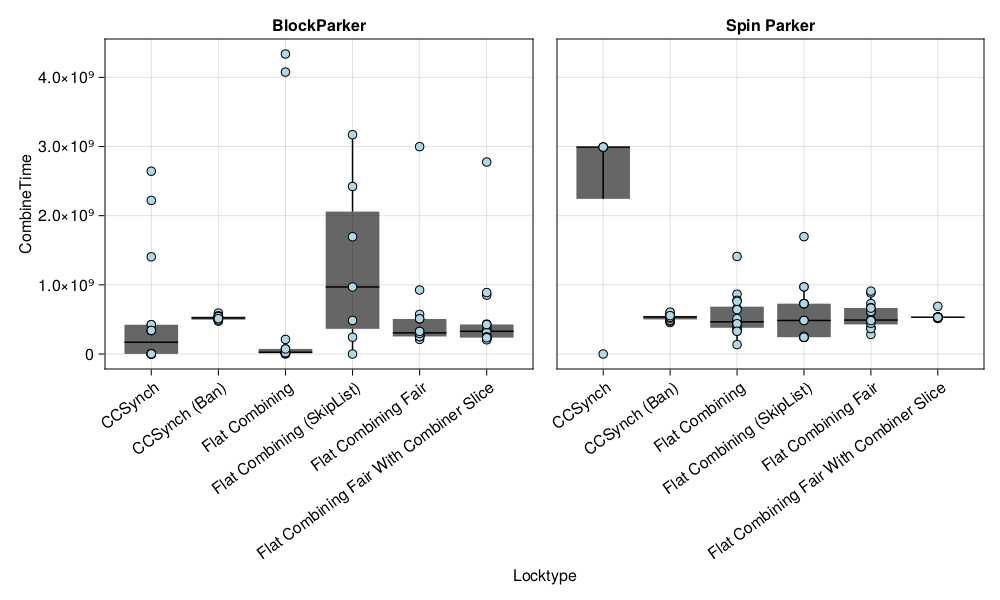

In [26]:
using DataFrames, Tidier, AlgebraOfGraphics, CairoMakie

bench_32thread = @chain dropmissing(bench) begin
    Tidier.@filter(ThreadNum == 16)
end

plt = data(bench_32thread) * mapping(:Locktype, :CombineTime, layout = :WaiterType) * (visual(BoxPlot) + (visual(Scatter, color = "lightblue", strokewidth = 1 )))


fig = draw(plt, axis=(xticklabelrotation=pi/5,), figure = (resolution=(1000,600),))

save("graphs/combining_time_box_plot.svg", fig)

fig